# Task 2: Community structure on graphs

In [1]:
import community as cm
import networkx as nx
import plotly as plt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display_html
def display_df_sbs(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

Given script (Louvain algorithm):

In [23]:
# load the edge list and create a directed Graph
fh = open("canvas/hamster.edgelist", 'rb')
G = nx.read_edgelist(fh)
fh.close()

In [24]:
# This method implements Louvain method using a greedy algorithm
# This is the partition of highest modularity, 
# i.e. the highest partition of the dendrogram generated by the Louvain algorithm
# more details: http://perso.crans.org/aynaud/communities/api.html#community.best_partition
partition = cm.community_louvain.best_partition(G)

We start by visualizing the communities the Louvain algorithm created. We do this by plotting the communities.

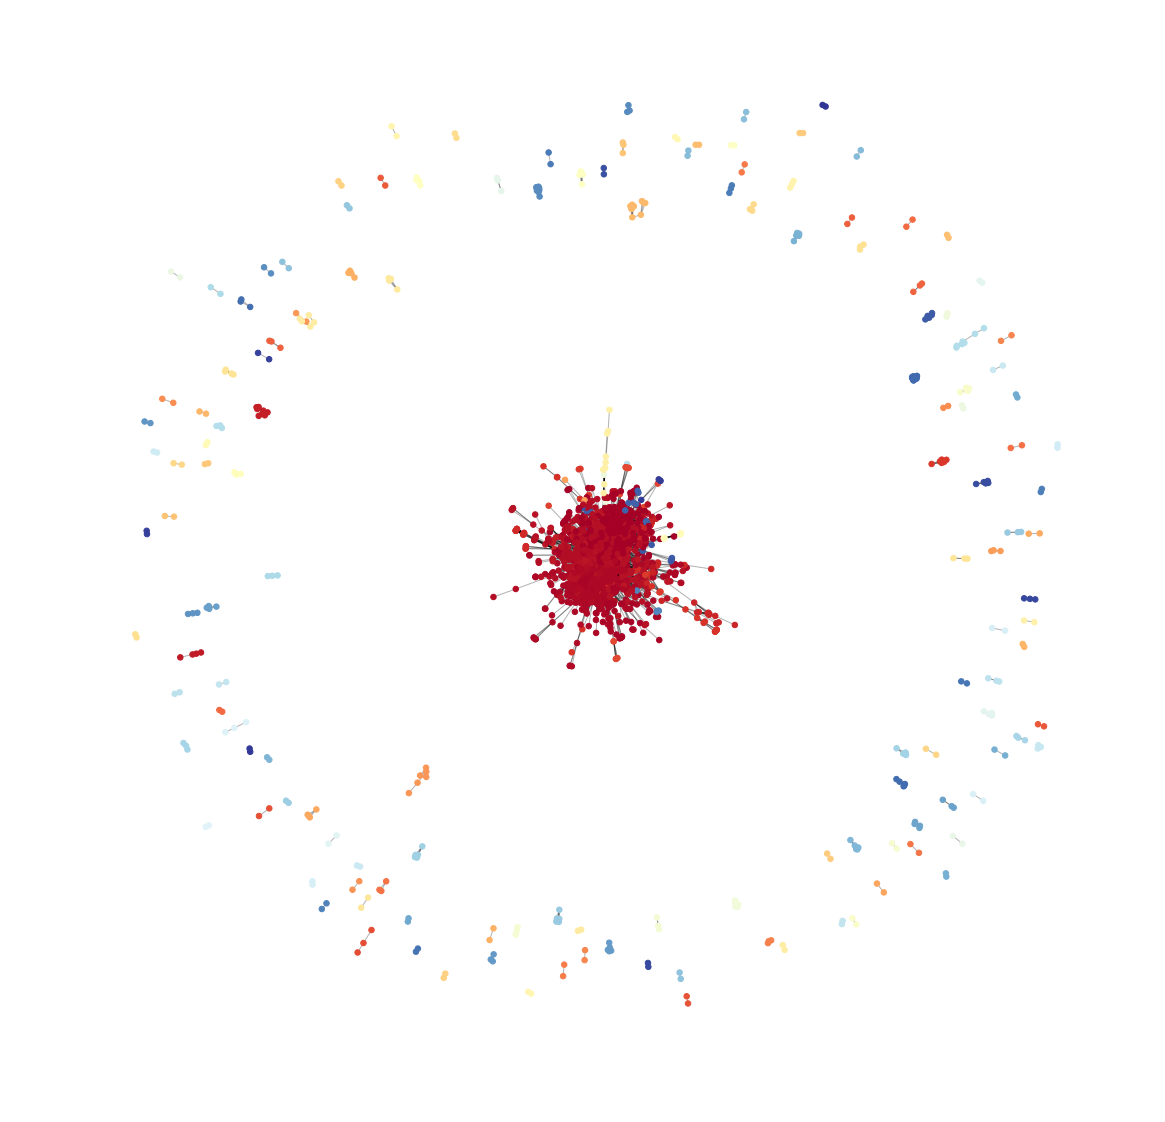

In [5]:
pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(20, 20))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=30, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

We see that the algorithm formed a few really big communities (shown in the center of the graph). These communities are hard to analyze because there are simply too many nodes. Interestingly, besides the few big communities which were generated, the algorithm also generated a lot of smaller communities. Because from this graph we can't deduce much information we decide to look at it in the form of a table.

In [25]:
# Calculate the amount of members that each community has.
numCommunities = len(set(partition.values()))
lst = []
for i in list(set(partition.values())):
    lst.append(sum(1 for x in partition.values() if x==i))
df_communities = pd.DataFrame({'community': range(0,numCommunities), 'members': lst})
display_df_sbs(df_communities.head(37), df_communities.iloc[37:74], df_communities.iloc[74:111], 
               df_communities.iloc[111:148], df_communities.tail(35))

,community,members
0,0,511
1,1,38
2,2,160
3,3,329
4,4,83
5,5,252
6,6,166
7,7,194
8,8,46
9,9,35


The table confirms what we've already seen in the graph. There are a few really big communities, such as communities 0, 2, 3, 5, 6, and 7. Besides those large communities, most other communities are kept really small. To better see what's going on in the cluster of the big communities we zoom in on those communities. Next we compare community 0 against all other communities and we focus on the middle part of the diagram.

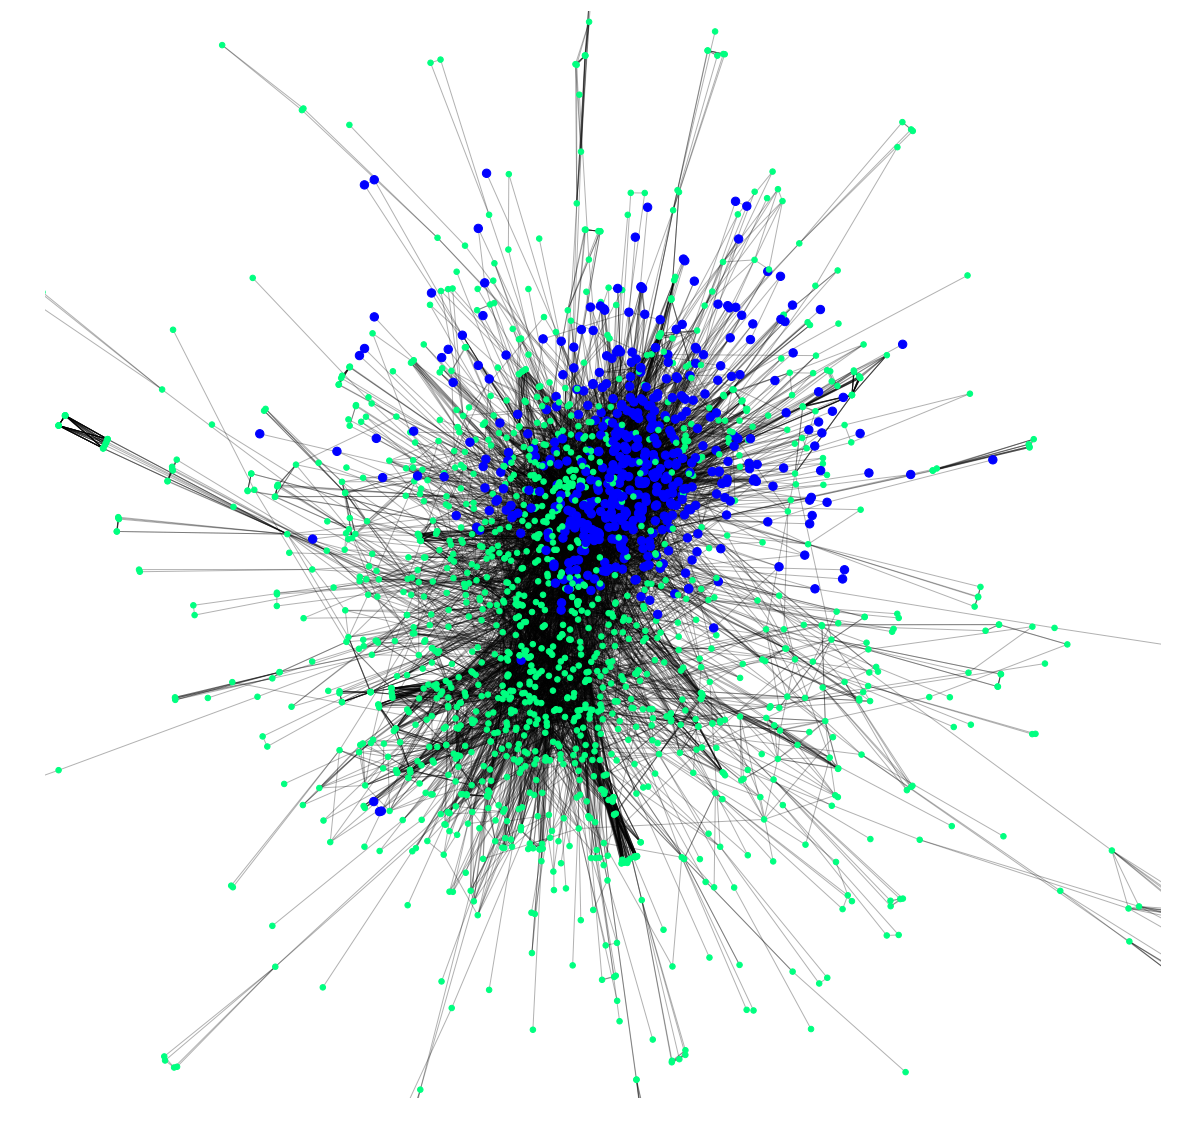

In [7]:
# Highlight one community (in this case, community 0)
part = partition.copy()
node_size = []
for node, community in part.items():
    if community == 0:
        node_size.append(70)
    else:
        part[node] = 1  # I put all the other communities in one communitiy
        node_size.append(30)
        
plt.figure(figsize=(20, 20))
plt.axis('off')
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.winter, node_color=list(part.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)

# x and y zoom, for far zoom run notebook as: jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.show(G)

We see that the blue dots, which represent the nodes in community 0, are mainly at the right side of the cluster of nodes. It makes sense for them to be close to eachother because they are all linked to eachother.

Sadly these visualizations still contain so many nodes and edges, that we cannot really get any interesting information out of them. Therefore, we will continue looking at different measures to analyze the community structures.

### Edge density between and within communities

In [8]:
# Total edge density in the whole graph
nx.density(G)

0.005653870016403056

In [9]:
# Edge density within community 0, as an example
H = G.copy()
for node, community in partition.items():
    if (community != 0):
        H.remove_node(node)
nx.density(H)

0.03560876405356663

As expected, the edge density within a community (community 0 in this case) is much larger than the edge density of the whole graph. Now let's see if we can generalize this for all communities by computing the average density within communities.

In [10]:
# Average edge density within all communities
density = 0
for i in range (0, numCommunities):
    H = G.copy()
    for node, community in partition.items():
        if (community != i):
            H.remove_node(node)
    density += nx.density(H)
density /= numCommunities
print(density)

0.904429466834257


As we can see the average density within communities is much higher. It is even much higher than the density within the largest community, community 0. This is because many of the smaller communities have so few members (two, for example) that they often have an edge density of 1. This makes the average much higher than it would be if we only had large communities like community 0. 

### Modularity

In [11]:
cm.modularity(partition, G)

0.5451264461283586

The value of the modularity of this partition is positive, meaning that the number of edges within groups exceeds the number expected on the basis of chance. In other words, the fraction of the edges that fall within the given groups is higher than the expected fraction if edges were distributed at random. The modularity of a partition is a good indicator of how 'strong' the communities are linked.

### Additional quality measures: Coverage & Performance

In [12]:
lst = list() #partition
for i in range (0, numCommunities):
    s = set()
    for node, community in partition.items():
        if (community == i):
            s.add(node)
    lst.append(s)
performance = nx.algorithms.community.quality.performance(G, lst)
print("Performance: " + str(performance))

Performance: 0.9113568642115909


The performance is defined by the ratio of the number of intra-community edges plus inter-community non-edges with the total number of potential edges.

In [13]:
coverage = nx.algorithms.community.quality.coverage(G, lst)
print("Coverage: " + str(coverage))

Coverage: 0.7294810895315976


The coverage is defined by the ratio of the number of intra-community edges to the total number of edges in the graph.

Similarly to the modularity, these two measures also tell us that we are dealing with relatively strong communities.

Now let's see if we can find anything interesting by looking at the performance and coverage of a subset of the graph. Let's take the top-10 communities as an example. We will remove all other communities from the graph, and see how this influences our quality measures.

In [14]:
part = partition.copy()
lst2 = lst.copy()
del lst2[10:len(lst2)]
H = G.copy()
for node, community in partition.items():
    if (community >= 10):
        H.remove_node(node)
        del part[node]
modularity = cm.modularity(part, H)
print("Modularity: " + str(modularity))
performance = nx.algorithms.community.quality.performance(H, lst2)
print("Performance: " + str(performance))
coverage = nx.algorithms.community.quality.coverage(H, lst2)
print("Coverage: " + str(coverage))

Modularity: 0.5071937138614645
Performance: 0.8418818881883932
Coverage: 0.7203472811541223


We can see that, because these top-10 communities obviously represent a very large portion of the graph, the results are quite similar. However, for each quality measure, the result is slightly lower, indicating that the addition of many smaller communities increases the results of these quality measures. Intuitively, however, we would think that adding many small communities wouldn't really improve the 'quality' of the graph. Instead, we think that these smaller communities, with two nodes for instance, simply increase the the results because they are considered as a very 'strong' community, due to them having the highest possible amount of edges between them, namely 1. However, subjectively, this doesn't truly improve the quality of the graph, thus the addition of these smaller communities is simply deteriorating the accuracy of the quality measures.

#### Removing small communities from the graph

So, because the aforementioned small communities seem to degrade the results of our quality measures, let's try removing all communities with only two or three members from our graph.

In [26]:
part = partition.copy()
H = G.copy()
lst = list()
for node, community in partition.items():
    if (df_communities.iloc[community]['members'] <= 3):
        H.remove_node(node)
        lst.append(node)
for i in reversed(lst):
    part.pop(i)

Now let's re-calculate our info:

In [27]:
# Calculate the amount of members that each community has.
numCommunities = len(set(part.values()))
lst = []
for i in list(set(part.values())):
    lst.append(sum(1 for x in part.values() if x==i))
df_communities = pd.DataFrame({'community': range(0,numCommunities), 'members': lst})
display_df_sbs(df_communities.head(12), df_communities.iloc[12:24], df_communities.iloc[24:36], df_communities.iloc[36:48],
               df_communities.tail(9))

,community,members
0,0,511
1,1,38
2,2,160
3,3,329
4,4,83
5,5,252
6,6,166
7,7,194
8,8,46
9,9,35


Let's plot our new graph:

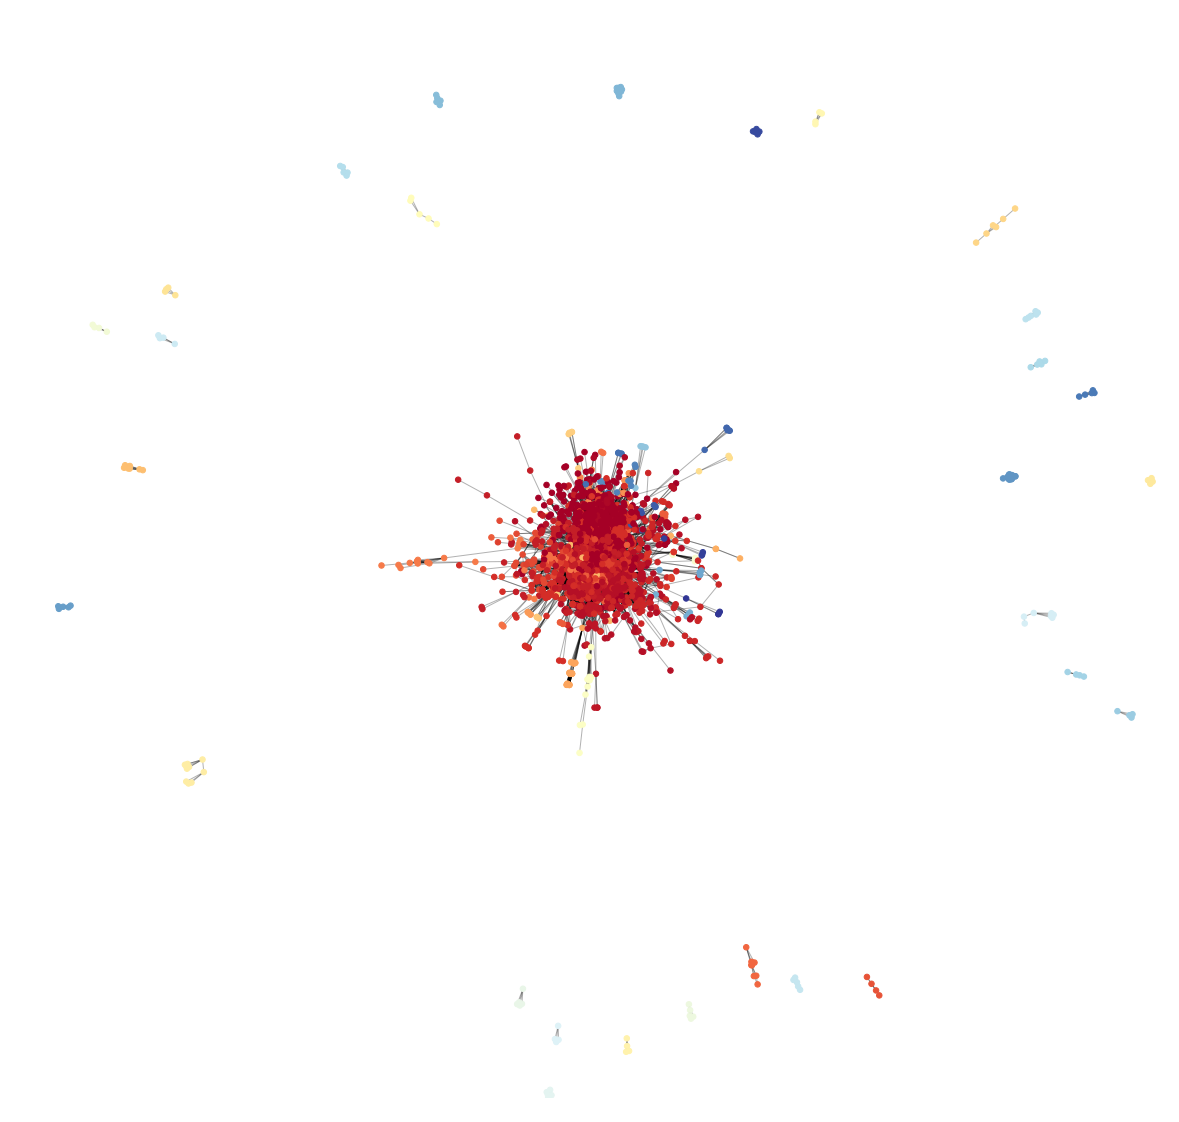

In [17]:
pos = nx.spring_layout(H)  # compute graph layout
plt.figure(figsize=(20, 20))
plt.axis('off')
nx.draw_networkx_nodes(H, pos, node_size=30, cmap=plt.cm.RdYlBu, node_color=list(part.values()))
nx.draw_networkx_edges(H, pos, alpha=0.3)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show(H)

We see that most of the graph has remained unchanged, but many of the small communities in the outer circle have been removed, as desired. Now let's see how this affects the results of the density calculations.

In [28]:
# Total edge density in the whole graph
nx.density(H)

0.007167431817815091

In [29]:
# Edge density within community 0, as an example
I = H.copy()
for node, community in part.items():
    if (community != 0):
        I.remove_node(node)
nx.density(I)

0.03560876405356663

In [30]:
# Average edge density within all communities
density = 0
for i in range (0, numCommunities):
    I = H.copy()
    for node, community in part.items():
        if (community != i):
            I.remove_node(node)
    density += nx.density(I)
density /= numCommunities
print(density)

0.21627909557868472


As we can see here, the new graph without small communities gives us a much more realistic value for the average edge density within communities, because there aren't so many graphs with a density of 1 anymore.